## Pre-install packages
- Set default values:
  - Training Dates
  - Sock Symbols Allowed

In [1]:
start_training_date = '2020-01-01'
symbols = {
    "AAPL": "Apple Inc.",
    "NET": "Cloudflare Inc.",
    "SNOW": "Snowflake Inc.",
    "MSFT": "Microsoft Corporation",
    "META": "Meta Platforms Inc.",
    "TSLA": "Tesla Inc.",
    "DOX": "Amdocs Ltd",
    "CRM": "Salesforce Inc.",
    "ADBE": "Adobe Inc.",
    "F": "Ford Motor Co.",
    "T": "AT&T Inc.",
    "VZ": "Verizon Communications",
    "DOX": "Amdocs Ltd",
    "NVDA": "Nvidia Corporation",
}

In [2]:
%pip install yfinance 
%pip install pandas 
%pip install numpy 
%pip install scikit-learn 
%pip install statsmodels 
%pip install Flask 
%pip install matplotlib
%pip install holidays
%pip install yahoo_fin
%pip install requests_html
%pip install importlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Data Collection

In [3]:
import yfinance as yf

# Download stock data from a specific start date until today
data = yf.download(list(symbols.keys()), start="2018-01-01")
data.tail()

[*********************100%***********************]  13 of 13 completed


Price        Adj Close                                                         \
Ticker            AAPL        ADBE         CRM        DOX       F        META   
Date                                                                            
2024-12-09  246.750000  547.929993  351.570007  86.680000  10.600  613.570007   
2024-12-10  247.770004  547.049988  348.820007  86.070000  10.560  619.320007   
2024-12-11  246.490005  549.929993  354.850006  87.129997  10.410  632.679993   
2024-12-12  247.960007  474.630005  358.029999  88.440002  10.390  630.789978   
2024-12-13  246.399994  461.375000  354.940002  87.690002  10.395  619.049988   

Price                                                       ...  Volume  \
Ticker            MSFT         NET        NVDA        SNOW  ...     DOX   
Date                                                        ...           
2024-12-09  446.019989  113.870003  138.809998  180.759995  ...  492400   
2024-12-10  443.329987  111.199997  135.070007  171.550003  ...  720400   
2024-12-11  448.989990  114.510002  139.309998  171.960007  ...  781400   
2024-12-12  449.559998  114.889999  137.339996  170.000000  ...  902200   
2024-12-13  446.584991  113.400002  133.955002  167.060699  ...  115839   

Price                                                                      \
Ticker             F      META      MSFT        NET       NVDA       SNOW   
Date                                                                        
2024-12-09  53230100  11426000  19144400  3199100.0  189308600  6336100.0   
2024-12-10  45084300  10938900  18469500  2703300.0  210020900  8609600.0   
2024-12-11  60487100  10837200  19200200  2604100.0  184905200  5475500.0   
2024-12-12  38330600   7444700  20790000  1627500.0  157666300  4398500.0   
2024-12-13  14961023   3492282   6030951   660674.0  128793450  2517699.0   

Price                                      
Ticker             T       TSLA        VZ  
Date                                       
2024-12-09  38385900   96359200  15570300  
2024-12-10  32851500   97563600  16337200  
2024-12-11  38518100  104287600  13986100  
2024-12-12  22001300   87260300  11214500  
2024-12-13  11861119   45617829   4253662  

[5 rows x 78 columns]

In [4]:
# Reset the multi-index into a long-form DataFrame
# Reshape data: Stack and reset index
data_2D = (
    data.stack(level=1, future_stack=True)  # Stack the stock symbols
    .reset_index()
    .rename(columns={"level_1": "symbol"})  # Rename the stacked column to 'symbol'
)

data_2D.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       22750 non-null  datetime64[ns]
 1   Ticker     22750 non-null  object        
 2   Adj Close  21642 non-null  float64       
 3   Close      21642 non-null  float64       
 4   High       21642 non-null  float64       
 5   Low        21642 non-null  float64       
 6   Open       21642 non-null  float64       
 7   Volume     21642 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.4+ MB


In [5]:
data_2D.columns = [col.replace(' ', '_') for col in data_2D.columns.values]
data_2D.columns

Index(['Date', 'Ticker', 'Adj_Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')

# Exploratory Data

In [6]:
data_2D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       22750 non-null  datetime64[ns]
 1   Ticker     22750 non-null  object        
 2   Adj_Close  21642 non-null  float64       
 3   Close      21642 non-null  float64       
 4   High       21642 non-null  float64       
 5   Low        21642 non-null  float64       
 6   Open       21642 non-null  float64       
 7   Volume     21642 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.4+ MB


In [7]:
data_2D.describe()

,Date,Adj_Close,Close,High,Low,Open,Volume
count,22750,21642.000000,21642.000000,21642.000000,21642.000000,21642.000000,2.164200e+04
mean,2021-06-23 15:59:27.085714176,139.715233,142.088640,144.055953,140.024353,142.058265,7.162070e+07
min,2018-01-02 00:00:00,3.151429,3.177000,3.249500,3.111500,3.162250,1.158390e+05
25%,2019-09-27 00:00:00,26.422247,28.632931,28.947000,28.217524,28.588292,4.723325e+06
50%,2021-06-23 12:00:00,89.754997,92.155003,93.285000,90.985001,92.135002,2.256080e+07
75%,2023-03-21 00:00:00,214.598938,216.114998,219.445004,212.617496,215.744999,6.525668e+07
max,2024-12-13 00:00:00,688.369995,688.369995,699.539978,678.909973,696.280029,2.511528e+09
std,NaN,137.114406,136.213093,137.940764,134.393462,136.213053,1.398557e+08


From multi-index data 
 Price      Ticker
Adj Close  AAPL        0
           ADBE        0
           CRM         0
           DOX         0
           F           0
                    ... 
Volume     NVDA        0
           SNOW      681
           T           0
           TSLA        0
           VZ          0
Length: 78, dtype: int64
From data_2D 
 Date            0
Ticker          0
Adj_Close    1108
Close        1108
High         1108
Low          1108
Open         1108
Volume       1108
dtype: int64


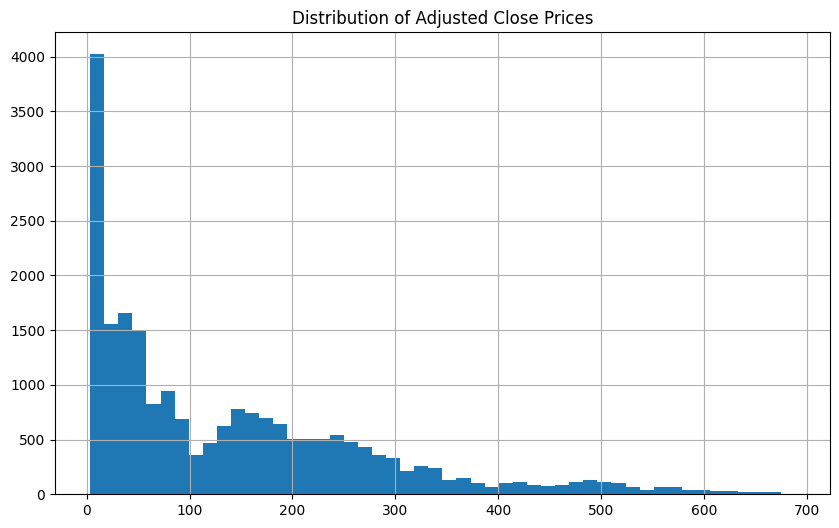

In [8]:

# Check for missing values
print("From multi-index data \n", data.isnull().sum())
print("From data_2D \n", data_2D.isnull().sum())

# Visualize the distribution of the target variable (e.g., Adj_Close)
import matplotlib.pyplot as plt

data_2D['Adj_Close'].hist(bins=50, figsize=(10, 6))
plt.title('Distribution of Adjusted Close Prices')
plt.show()

In [9]:
# Drop rows with any NaN values
data_2D = data_2D.dropna()

print(data_2D.isnull().sum())  # Ensure no NaNs remain
print(data_2D.head())

Date         0
Ticker       0
Adj_Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64
        Date Ticker   Adj_Close       Close        High         Low  \
0 2018-01-02   AAPL   40.524353   43.064999   43.075001   42.314999   
1 2018-01-02   ADBE  177.699997  177.699997  177.800003  175.259995   
2 2018-01-02    CRM  103.948547  104.410004  104.699997  102.269997   
3 2018-01-02    DOX   58.145035   66.180000   66.250000   65.440002   
4 2018-01-02      F    8.875400   12.660000   12.660000   12.500000   

         Open       Volume  
0   42.540001  102223600.0  
1  175.850006    2432800.0  
2  102.879997    4669200.0  
3   65.500000     525300.0  
4   12.520000   20773300.0  


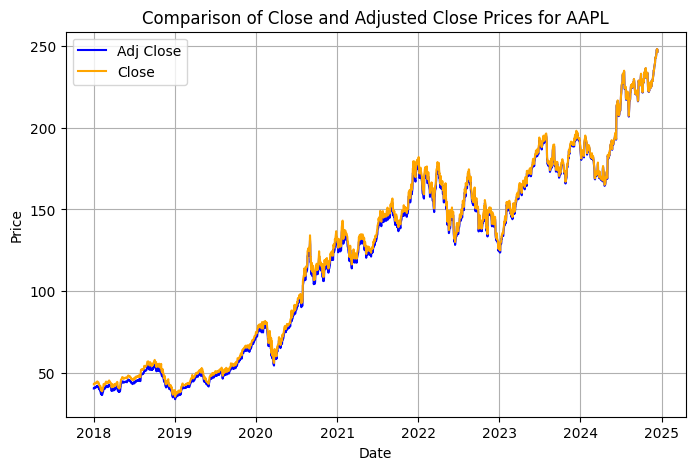

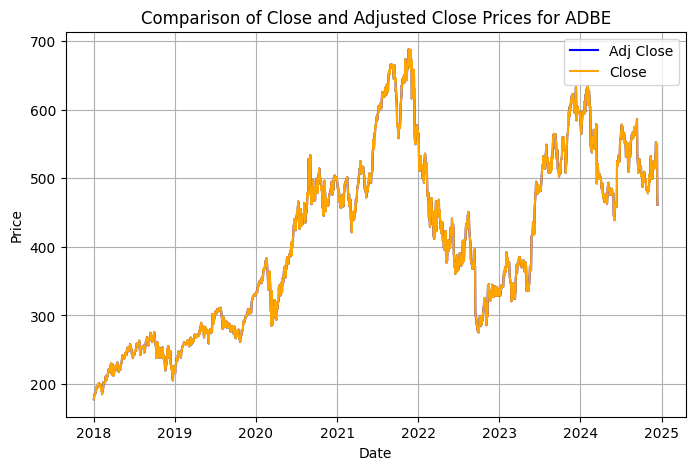

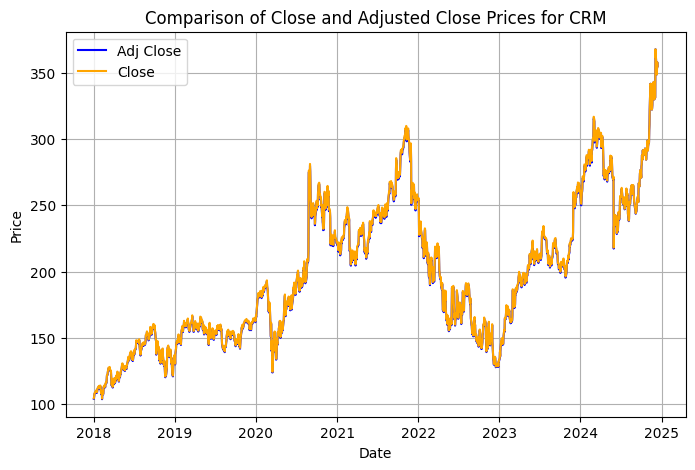

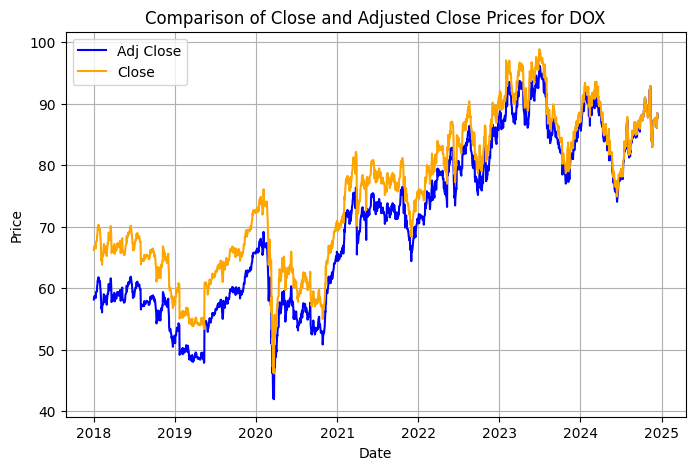

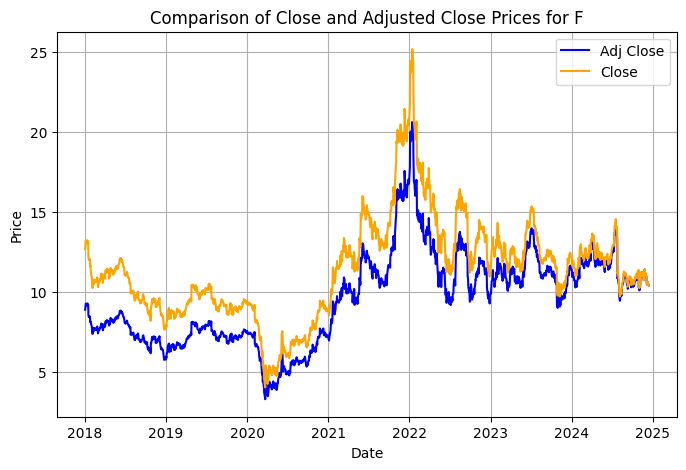

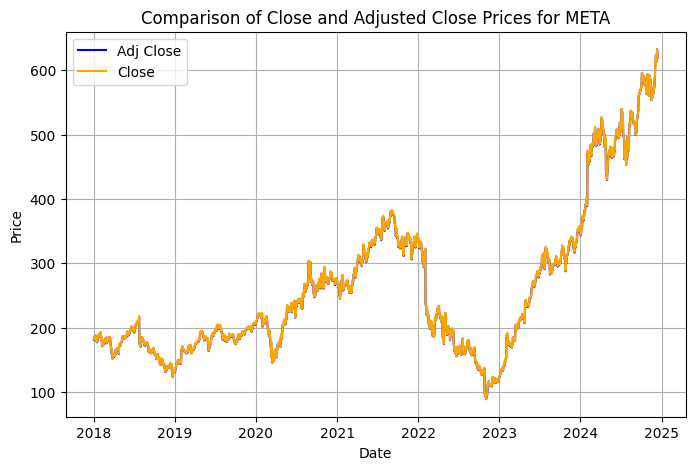

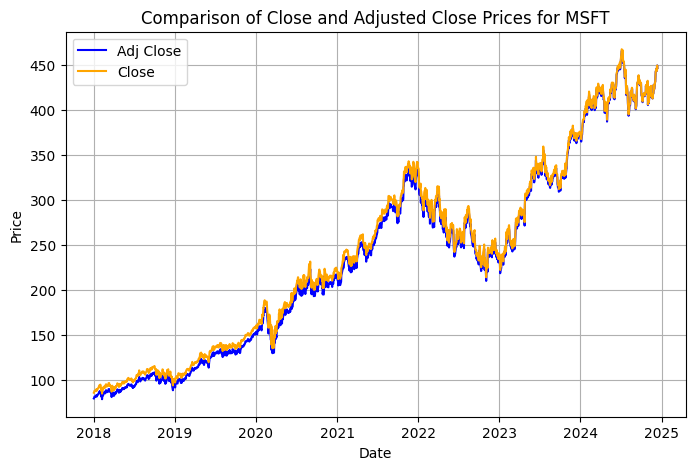

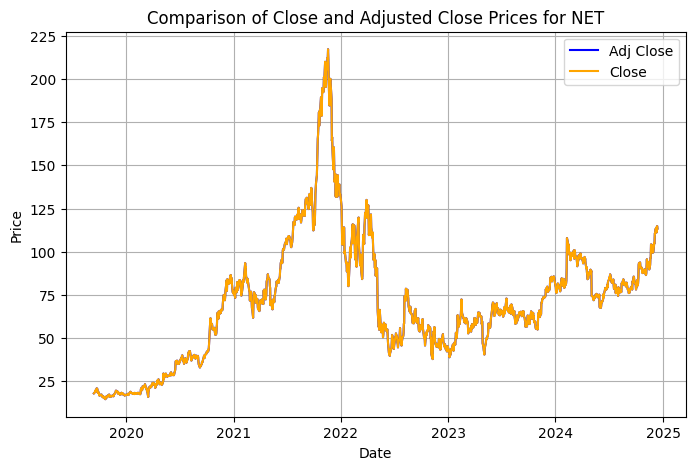

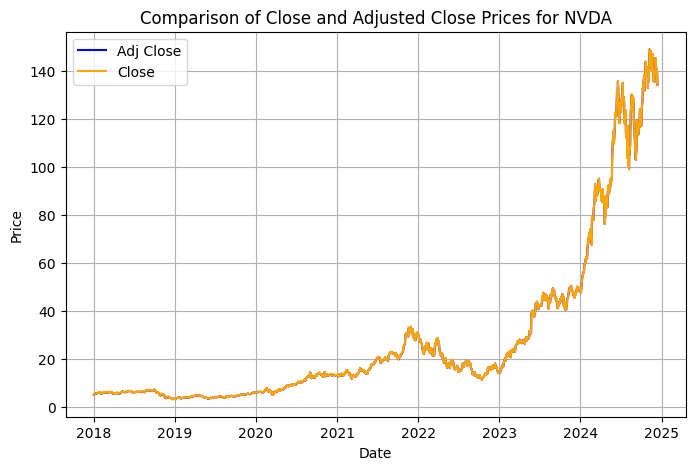

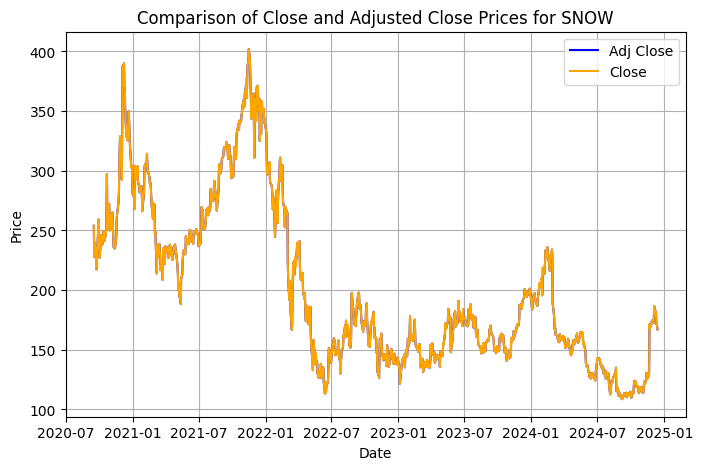

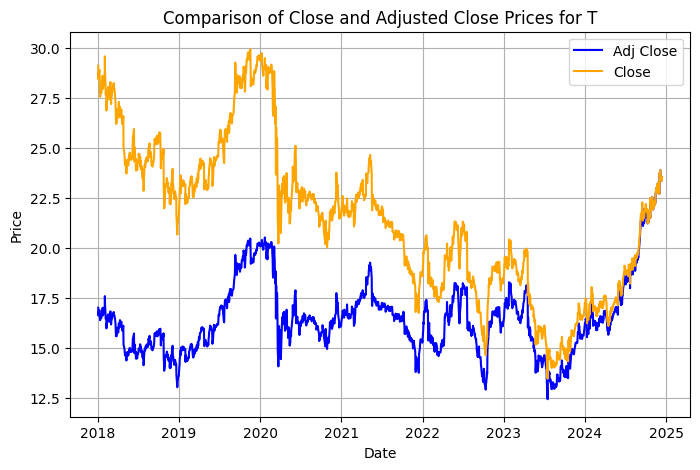

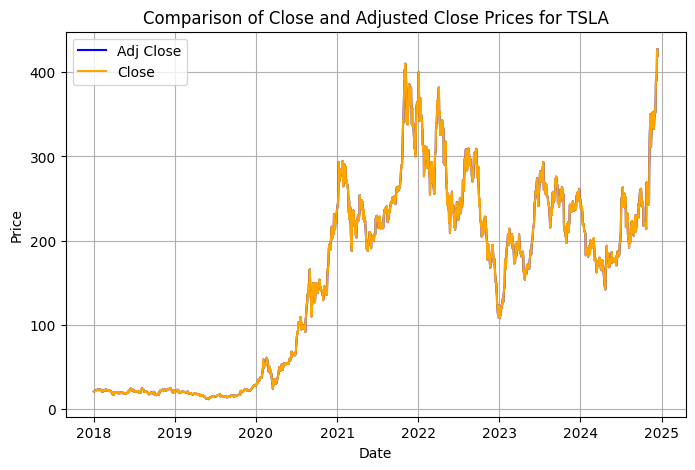

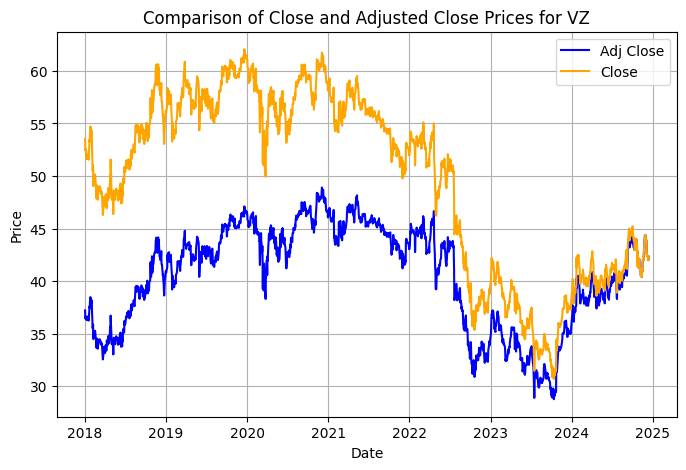

In [10]:
import matplotlib.pyplot as plt

# Group data by 'Ticker'
grouped = data_2D.groupby('Ticker')

# Iterate through each ticker and plot its data
for ticker, group in grouped:
    plt.figure(figsize=(8, 5))
    plt.plot(group['Date'], group['Adj_Close'], label='Adj Close', color='blue')
    plt.plot(group['Date'], group['Close'], label='Close', color='orange')
    plt.title(f'Comparison of Close and Adjusted Close Prices for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()
        

# Data Transform - Add feaures
- Encode tickers so I can keep adding tickers without adding complexity and keeping dataset compact
- Add Features
  - Date Features
    - day of the week
    - day of the month
    - is_holiday the day after
    - is_holiday the day before
    - year, month, day

  - Can I get the earnings reports?
    - days to the earning reports
    - days after the earning reporst
    - forecast?

In [11]:
data_transformed = data_2D.copy()

from sklearn.preprocessing import LabelEncoder
import pandas as pd

encoder = LabelEncoder()
data_transformed['Ticker_Encoded'] = encoder.fit_transform(data_transformed['Ticker'])
ticker_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))


In [12]:
from utils import transform_date
data_transformed = pd.concat([data_transformed, data_transformed['Date'].apply(transform_date).apply(pd.Series)], axis=1)
data_transformed.tail()

,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume,Ticker_Encoded,year,month,day,weekday,is_day_before_a_holiday,is_day_after_a_holiday
22745,2024-12-13,NVDA,133.955002,133.955002,139.600006,132.539993,139.000000,128793450.0,8,2024,12,13,4,0,0
22746,2024-12-13,SNOW,167.060699,167.060699,170.729996,165.729996,169.520004,2517699.0,9,2024,12,13,4,0,0
22747,2024-12-13,T,23.535000,23.535000,23.580000,23.260000,23.370001,11861119.0,10,2024,12,13,4,0,0
22748,2024-12-13,TSLA,427.140015,427.140015,431.600006,415.709991,420.000000,45617829.0,11,2024,12,13,4,0,0
22749,2024-12-13,VZ,42.320000,42.320000,42.379799,41.810001,42.000000,4253662.0,12,2024,12,13,4,0,0


In [13]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

encoder = LabelEncoder()
data_transformed['Ticker_Encoded'] = encoder.fit_transform(data_transformed['Ticker'])
ticker_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
data_transformed


,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume,Ticker_Encoded,year,month,day,weekday,is_day_before_a_holiday,is_day_after_a_holiday
0,2018-01-02,AAPL,40.524353,43.064999,43.075001,42.314999,42.540001,102223600.0,0,2018,1,2,1,1,0
1,2018-01-02,ADBE,177.699997,177.699997,177.800003,175.259995,175.850006,2432800.0,1,2018,1,2,1,1,0
2,2018-01-02,CRM,103.948547,104.410004,104.699997,102.269997,102.879997,4669200.0,2,2018,1,2,1,1,0
3,2018-01-02,DOX,58.145035,66.180000,66.250000,65.440002,65.500000,525300.0,3,2018,1,2,1,1,0
4,2018-01-02,F,8.875400,12.660000,12.660000,12.500000,12.520000,20773300.0,4,2018,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22745,2024-12-13,NVDA,133.955002,133.955002,139.600006,132.539993,139.000000,128793450.0,8,2024,12,13,4,0,0
22746,2024-12-13,SNOW,167.060699,167.060699,170.729996,165.729996,169.520004,2517699.0,9,2024,12,13,4,0,0
22747,2024-12-13,T,23.535000,23.535000,23.580000,23.260000,23.370001,11861119.0,10,2024,12,13,4,0,0
22748,2024-12-13,TSLA,427.140015,427.140015,431.600006,415.709991,420.000000,45617829.0,11,2024,12,13,4,0,0


In [14]:
# Get historical earnings for AAPL
ticker = yf.Ticker("AAPL")
earnings = ticker.income_stmt  # Annual earnings
earnings


,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0,NaN
Tax Rate For Calcs,0.240912,0.147192,0.162,0.133,NaN
Normalized EBITDA,134661000000.0,125820000000.0,130541000000.0,123136000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,93736000000.0,96995000000.0,99803000000.0,94680000000.0,NaN
Reconciled Depreciation,11445000000.0,11519000000.0,11104000000.0,11284000000.0,NaN
Reconciled Cost Of Revenue,210352000000.0,214137000000.0,223546000000.0,212981000000.0,NaN
EBITDA,134661000000.0,125820000000.0,130541000000.0,123136000000.0,NaN
EBIT,123216000000.0,114301000000.0,119437000000.0,111852000000.0,NaN
Net Interest Income,NaN,-183000000.0,-106000000.0,198000000.0,890000000.0
Interest Expense,NaN,3933000000.0,2931000000.0,2645000000.0,2873000000.0


**Note**: As yfinance was giving errors while trying to pull the earning reports, I swithched to use `Alpha Vantage`, this data source requires `API_KEY` which can be retrivable from their website: https://www.alphavantage.co/support/#api-key

Im only going to use it to recreate historical data, we will continue using `yfinance` for future earnings

In [15]:
from earnings import load_all_historical_earnings_to_dataframe

unique_tickers = data_transformed['Ticker'].unique()
past_earnings = load_all_historical_earnings_to_dataframe(symbols=unique_tickers)

past_earnings

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
past_earnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   fiscalDateEnding    1129 non-null   object
 1   reportedDate        1129 non-null   object
 2   reportedEPS         1129 non-null   object
 3   estimatedEPS        1129 non-null   object
 4   surprise            1129 non-null   object
 5   surprisePercentage  1129 non-null   object
 6   reportTime          1129 non-null   object
 7   symbol              1129 non-null   object
dtypes: object(8)
memory usage: 70.7+ KB


In [ ]:
past_earnings['reportedDate'] = pd.to_datetime(past_earnings['reportedDate'])
past_earnings['fiscalDateEnding'] = pd.to_datetime(past_earnings['fiscalDateEnding'])
past_earnings.head()

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,reportTime,symbol
0,2024-09-30,2024-10-23,0.6,0.57,0.03,5.2632,pre-market,T
1,2024-06-30,2024-07-24,0.57,0.57,0,0,pre-market,T
2,2024-03-31,2024-04-24,0.55,0.54,0.01,1.8519,pre-market,T
3,2023-12-31,2024-01-24,0.54,0.56,-0.02,-3.5714,pre-market,T
4,2023-09-30,2023-10-19,0.64,0.62,0.02,3.2258,pre-market,T


In [ ]:
from earnings import load_all_upcoming_earnings_to_dataframe

unique_tickers = data_transformed['Ticker'].unique()
future_earnings = load_all_upcoming_earnings_to_dataframe(symbols=unique_tickers)

future_earnings

LEGC: Loading upcoming data for T from T.json...
LEGC: Loading upcoming data for MSFT from MSFT.json...
LEGC: Loading upcoming data for F from F.json...
LEGC: Loading upcoming data for TSLA from TSLA.json...
LEGC: Loading upcoming data for AAPL from AAPL.json...
LEGC: Loading upcoming data for DOX from DOX.json...
LEGC: Loading upcoming data for VZ from VZ.json...
LEGC: Loading upcoming data for CRM from CRM.json...
LEGC: Loading upcoming data for SNOW from SNOW.json...
LEGC: Loading upcoming data for ADBE from ADBE.json...
LEGC: Loading upcoming data for NET from NET.json...
LEGC: Loading upcoming data for NVDA from NVDA.json...
LEGC: Loading upcoming data for META from META.json...
LEGC: Combined upcoming earnings data loaded. Shape: (13, 9)


,Earnings Date Start,Earnings Date End,Earnings High,Earnings Low,Earnings Average,Revenue High,Revenue Low,Revenue Average,symbol
0,2025-01-22,2025-01-27,0.56000,0.47000,0.50430,32409336000,31427000000,31974261430,T
1,2025-01-28,2025-02-03,3.47000,3.08000,3.15862,70520000000,68488700000,68912341850,MSFT
2,2025-02-04,2025-02-10,0.43000,0.31000,0.34528,46922000000,41441000000,43825950000,F
3,2025-01-24,2025-02-03,0.96000,0.59000,0.76149,28928100000,25293000000,27420491340,TSLA
4,2025-01-30,2025-02-03,2.50000,2.19000,2.35487,129887000000,119563000000,124365081850,AAPL
5,2025-02-04,2025-02-10,1.67000,1.60000,1.63633,1116368000,1112200000,1114825770,DOX
6,2025-01-24,2025-01-24,1.17000,1.05925,1.10736,36050000000,34926000000,35394539900,VZ
7,2025-02-26,2025-03-03,2.72000,2.48000,2.61466,10178707000,9964635000,10034911320,CRM
8,2025-02-26,2025-03-03,0.27000,0.12000,0.17585,984000000,948900000,955732650,SNOW
9,2025-03-12,2025-03-17,5.02000,4.93000,4.97094,5730000000,5633000000,5664290590,ADBE


### Matching Fields Between Historical and Future Earnings

| **Field in Historical Data** | **Field in Future Data** | **Description**                                      |
|-------------------------------|--------------------------|------------------------------------------------------|
| `fiscalDateEnding`            | `Earnings Date`          | The date of the earnings report. Historical is actual; future is estimated. |
| `reportedEPS`                 | `Earnings Average`       | Earnings Per Share (EPS). Historical is reported; future is the average estimate. |
| `totalRevenue`                | `Revenue Average`        | Total revenue reported/estimated for the fiscal period. |

### Notes
- These fields are directly comparable across historical and future earnings data.
- Fields such as `Earnings High`, `Earnings Low`, `Revenue High`, and `Revenue Low` exist only in future data and may be added later for extended analysis.

In [ ]:
# Unify the date (incomming and history earnings)
import pandas as pd

# Example historical and future dataframes
historical_df = past_earnings.copy()
future_df = future_earnings.copy()
data_df = data_transformed.copy()

print(future_df.info())
print(historical_df.info())
print(data_transformed.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Earnings Date Start  13 non-null     object 
 1   Earnings Date End    13 non-null     object 
 2   Earnings High        13 non-null     float64
 3   Earnings Low         13 non-null     float64
 4   Earnings Average     13 non-null     float64
 5   Revenue High         13 non-null     int64  
 6   Revenue Low          13 non-null     int64  
 7   Revenue Average      13 non-null     int64  
 8   symbol               13 non-null     object 
dtypes: float64(3), int64(3), object(3)
memory usage: 1.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fiscalDateEnding    1129 non-null   datetime64[ns]
 1   re

In [ ]:
import pandas as pd

# Ensure proper column renaming and date formats
future_df.rename(columns={'symbol': 'Ticker'}, inplace=True)
historical_df.rename(columns={'symbol': 'Ticker'}, inplace=True)

future_df['Earnings Date Start'] = pd.to_datetime(future_df['Earnings Date Start'])
future_df['Earnings Date End'] = pd.to_datetime(future_df['Earnings Date End'])
historical_df['reportedDate'] = pd.to_datetime(historical_df['reportedDate'])
data_df['Date'] = pd.to_datetime(data_df['Date'])

# Step 1: Merge historical earnings into stock prices
merged_historical = pd.merge_asof(
    data_df.sort_values('Date'),
    historical_df.sort_values('reportedDate'),
    left_on='Date',
    right_on='reportedDate',
    by='Ticker',
    direction='backward'  # Matches the most recent past earnings report
)

# Calculate days after previous earnings
merged_historical['days_after_previous_earning'] = (
    merged_historical['Date'] - merged_historical['reportedDate']
).dt.days

# Step 2: Merge future earnings into stock prices
merged_future = pd.merge_asof(
    data_df.sort_values('Date'),
    future_df.sort_values('Earnings Date Start'),
    left_on='Date',
    right_on='Earnings Date Start',
    by='Ticker',
    direction='forward'  # Matches the closest upcoming earnings
)

# Calculate days to next earnings
merged_future['days_to_next_earning'] = (
    merged_future['Earnings Date Start'] - merged_future['Date']
).dt.days

# Step 3: Combine historical and future earnings data
final_merged = pd.merge(
    merged_historical,
    merged_future[['Date', 'Ticker', 'days_to_next_earning']],
    on=['Date', 'Ticker'],
    how='left'
)

# Clean up columns:
final_merged.drop(columns=['reportTime'], inplace=True)

# Convert object columns to float
columns_to_convert = ['reportedEPS', 'estimatedEPS', 'surprise', 'surprisePercentage']

for col in columns_to_convert:
    final_merged[col] = pd.to_numeric(final_merged[col], errors='coerce')  # Converts invalid entries to NaN

# Check the data types and any potential NaN values
print("\nUpdated Data Types:")
print(final_merged.dtypes)

print("\nSummary of Null Values After Conversion:")
print(final_merged.isnull().sum())

# Optional: Handle NaN values (if needed)
# Example: Fill with a default value or interpolate
final_merged[columns_to_convert] = final_merged[columns_to_convert].fillna(0)  # Replace NaN with 0

# Final structure
print("\nFinal Merged DataFrame Info:")
final_merged.info()

# Check for null values (optional)
null_summary = final_merged.isnull().sum()
print("\nNull Values Summary:")
print(null_summary)

# Sample rows for validation
print("\nSample Rows:")
print(final_merged.head())


Updated Data Types:
Date                           datetime64[ns]
Ticker                                 object
Adj_Close                             float64
Close                                 float64
High                                  float64
Low                                   float64
Open                                  float64
Volume                                float64
Ticker_Encoded                          int64
year                                    int64
month                                   int64
day                                     int64
weekday                                 int64
is_day_before_a_holiday                 int64
is_day_after_a_holiday                  int64
fiscalDateEnding               datetime64[ns]
reportedDate                   datetime64[ns]
reportedEPS                           float64
estimatedEPS                          float64
surprise                              float64
surprisePercentage                    float64
days_after_pr

In [ ]:
# Create moving averages for Adj_Close
window_sizes = [5, 10, 20]  # You can adjust the window sizes as needed
for window in window_sizes:
    final_merged[f'ma_{window}'] = final_merged.groupby('Ticker')['Adj_Close'].transform(lambda x: x.rolling(window).mean())
    final_merged[f'volatility_{window}'] = final_merged.groupby('Ticker')['Adj_Close'].transform(lambda x: x.rolling(window).std())
    
final_merged['pct_change'] = final_merged.groupby('Ticker')['Adj_Close'].transform(lambda x: x.pct_change())
final_merged['high_low_spread'] = (final_merged['High'] - final_merged['Low']) / final_merged['Low']
  
final_merged.tail()

,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume,Ticker_Encoded,year,...,days_after_previous_earning,days_to_next_earning,ma_5,volatility_5,ma_10,volatility_10,ma_20,volatility_20,pct_change,high_low_spread
21635,2024-12-13,ADBE,461.799988,461.799988,474.910004,461.575012,473.750000,3274673.0,1,2024,...,92,89,516.267993,44.112440,524.146997,32.317815,516.684497,24.359631,-0.027032,0.028890
21636,2024-12-13,AAPL,247.119995,247.119995,249.290207,246.960007,247.880005,8120285.0,0,2024,...,43,48,247.218002,0.635194,244.721999,2.842080,237.804999,7.842762,-0.003388,0.009436
21637,2024-12-13,TSLA,425.899994,425.899994,431.600006,415.709991,420.000000,33175134.0,11,2024,...,51,42,411.909998,15.874162,388.469998,28.686088,363.963000,32.499824,0.018656,0.038224
21638,2024-12-13,F,10.320000,10.320000,10.415000,10.320000,10.400000,7741895.0,4,2024,...,46,53,10.456000,0.118870,10.577000,0.211084,10.824000,0.321156,-0.006737,0.009205
21639,2024-12-13,VZ,42.021400,42.021400,42.042000,41.810001,42.000000,2327799.0,12,2024,...,52,42,42.150281,0.168550,42.587140,0.688026,42.832070,0.927618,-0.001393,0.005549


In [ ]:
final_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21640 entries, 0 to 21639
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         21640 non-null  datetime64[ns]
 1   Ticker                       21640 non-null  object        
 2   Adj_Close                    21640 non-null  float64       
 3   Close                        21640 non-null  float64       
 4   High                         21640 non-null  float64       
 5   Low                          21640 non-null  float64       
 6   Open                         21640 non-null  float64       
 7   Volume                       21640 non-null  float64       
 8   Ticker_Encoded               21640 non-null  int64         
 9   year                         21640 non-null  int64         
 10  month                        21640 non-null  int64         
 11  day                          21640 non-nu

# Train - Test Split

In [ ]:
""" 
valid_data = 15%
test_data = 15%
train_data = 70%
"""

train_split = int(0.7 * len(final_merged))  # 70% for training
valid_split = int(0.85 * len(final_merged))  # 15% for validation (remaining half of the 30% split)

# Perform splits based on index ranges (no shuffling)
train_data = final_merged.iloc[:train_split]
validation_data = final_merged.iloc[train_split:valid_split]
test_data = final_merged.iloc[valid_split:]

# Separate features and target for all splits
X_train = train_data.drop(columns=['Adj_Close', 'Date', 'Ticker', 'fiscalDateEnding', 'reportedDate'])
y_train = train_data['Adj_Close']

X_valid = validation_data.drop(columns=['Adj_Close', 'Date', 'Ticker', 'fiscalDateEnding', 'reportedDate'])
y_valid = validation_data['Adj_Close']

X_test = test_data.drop(columns=['Adj_Close', 'Date', 'Ticker', 'fiscalDateEnding', 'reportedDate'])
y_test = test_data['Adj_Close']

# Handle missing values
for column in X_train.columns:
    X_train[column].fillna(X_train[column].mean(), inplace=True)
    X_valid[column].fillna(X_train[column].mean(), inplace=True)
    X_test[column].fillna(X_train[column].mean(), inplace=True)

/var/folders/sl/kpl6n5j90zg8bxc7vtmmktdc0000gn/T/ipykernel_88526/1577522863.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[column].fillna(X_train[column].mean(), inplace=True)
/var/folders/sl/kpl6n5j90zg8bxc7vtmmktdc0000gn/T/ipykernel_88526/1577522863.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [ ]:
print(X_train.dtypes)

Close                          float64
High                           float64
Low                            float64
Open                           float64
Volume                         float64
Ticker_Encoded                   int64
year                             int64
month                            int64
day                              int64
weekday                          int64
is_day_before_a_holiday          int64
is_day_after_a_holiday           int64
reportedEPS                    float64
estimatedEPS                   float64
surprise                       float64
surprisePercentage             float64
days_after_previous_earning      int64
days_to_next_earning             int64
ma_5                           float64
volatility_5                   float64
ma_10                          float64
volatility_10                  float64
ma_20                          float64
volatility_20                  float64
pct_change                     float64
high_low_spread          

In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()

# Fit scaler on training data
X_train_scaled = scaler.fit_transform(X_train)

# Save scaler to a file
joblib.dump(scaler, "scaler.pkl")

# Transform validation and test data
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

# Baseline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

MAE: 1.8838079070314284
MSE: 6.038603158843568
R2 Score: 0.99980206442645


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model_r = LinearRegression()

# Train the model
model_r.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model_r.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")


MAE: 1.8838079070314284
MSE: 6.038603158843568
R2 Score: 0.99980206442645


	•	MAE (Mean Absolute Error): 1.90 – On average, the model’s predictions deviate by approximately 2 units from the actual adjusted close prices.
	•	MSE (Mean Squared Error): 6.06 – The squared error (penalizing larger deviations more heavily) is still quite low.
	•	R² Score: 0.9998 – Your model explains nearly all the variability in the target variable.

In [ ]:
# Lets Validate the model against unseen data:

# Predict on the validation set
y_valid_pred = model.predict(X_valid_scaled)

# Evaluate the model on validation data
mae_valid = mean_absolute_error(y_valid, y_valid_pred)
mse_valid = mean_squared_error(y_valid, y_valid_pred)
r2_valid = r2_score(y_valid, y_valid_pred)

print(f"Validation MAE: {mae_valid}")
print(f"Validation MSE: {mse_valid}")
print(f"Validation R2 Score: {r2_valid}")

Validation MAE: 1.39838618656413
Validation MSE: 3.4523371867229873
Validation R2 Score: 0.9998046888323311


	1.	Validation MAE (1.48):
	•	This means the average absolute difference between the predicted and actual Adjusted Close prices is about 1.63. For stock prices, this level of error is quite low, depending on the price ranges in your dataset.
	2.	Validation MSE (3.63):
	•	The Mean Squared Error measures the average squared difference between predicted and actual values. A lower MSE indicates fewer large errors, which is crucial in stock price prediction.
	3.	Validation R² (0.9997):
	•	An R² score very close to 1 indicates that the model explains almost all the variance in the validation data. This is a sign of an excellent fit.

# Introducing Ramdon Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=None,    # Maximum depth of the tree
    random_state=42,   # Ensures reproducibility
    n_jobs=-1          # Use all CPU cores
)

# Train Random Forest on raw training data (no scaling)
rf_model.fit(X_train, y_train)

# Predict on validation set
y_valid_pred = rf_model.predict(X_valid)

# Evaluate Random Forest model
valid_mae = mean_absolute_error(y_valid, y_valid_pred)
valid_mse = mean_squared_error(y_valid, y_valid_pred)
valid_r2 = r2_score(y_valid, y_valid_pred)

print(f"Validation MAE: {valid_mae}")
print(f"Validation MSE: {valid_mse}")
print(f"Validation R2 Score: {valid_r2}")

Validation MAE: 0.8379676692552627
Validation MSE: 1.5013660855360447
Validation R2 Score: 0.9999150623049242


### Compare results:

| **Metric**         | **Linear Regression** | **Random Forest**   |
|---------------------|-----------------------|---------------------|
| **Validation MAE**  | 1.48                  | **0.877**          |
| **Validation MSE**  | 3.63                  | **1.45619**          |
| **Validation R²**   | 0.99976               | **0.99991**         |

Key Takeaways
1.	Lower MAE and MSE:
Random Forest has substantially reduced the mean absolute and mean squared errors, indicating better prediction accuracy.
2.	Higher R² Score:
The higher R² score indicates that the Random Forest model is explaining more variability in the data.
3.	Handling Complexity:
Random Forest captures non-linear relationships and interactions between features better than Linear Regression, which assumes linear relationships.

In [ ]:

import joblib

# Save the trained Random Forest model to a file
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(model_r, 'linear_regression_model.pkl')

print("Model saved successfully!")

Model saved successfully!


In [ ]:
import json

ticker_mapping = dict(zip(final_merged["Ticker"].unique(), final_merged["Ticker_Encoded"].unique()))

# Convert numpy types to native Python types
ticker_mapping = {key: int(value) for key, value in ticker_mapping.items()}

# Save the mapping to a JSON file
import json
with open("ticker_mapping.json", "w") as file:
    json.dump(ticker_mapping, file)


# Just Another Manual Test

In [17]:
import pandas as pd
from utils import predict  # Import your data preparation function

# Set up the symbol and date for prediction
today = pd.Timestamp("today").normalize()
future_date = today + pd.Timedelta(days=20)

for symbol in symbols:
    print(predict(symbol, future_date))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=or

Stock Symbol: AAPL
Date: 2024-12-13 00:00:00
Close Price: $246.29
Adjusted Close Price: $246.29
LEGC: Loaded historical earnings data for AAPL into DataFrame.
LEGC: Loaded upcoming earnings data for AAPL into DataFrame.
Predicted Adjusted Close for AAPL on 2025-01-02 (Random Forest): 248.00874588012695
Predicted Adjusted Close for AAPL on 2025-01-02 (Linear Regression): 363.6015211470921
{'most_recent_data': {'date': Timestamp('2024-12-13 00:00:00'), 'close': np.float64(246.28500366210938), 'adj_close': np.float64(246.28500366210938)}, 'ramdom_forest': np.float64(248.00874588012695), 'linear_regression': np.float64(363.6015211470921), 'date': datetime.date(2025, 1, 2)}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=or

Stock Symbol: NET
Date: 2024-12-13 00:00:00
Close Price: $113.25
Adjusted Close Price: $113.25
LEGC: Loaded historical earnings data for NET into DataFrame.
LEGC: Loaded upcoming earnings data for NET into DataFrame.
Predicted Adjusted Close for NET on 2025-01-02 (Random Forest): 114.59728073120117
Predicted Adjusted Close for NET on 2025-01-02 (Linear Regression): 232.253262317025
{'most_recent_data': {'date': Timestamp('2024-12-13 00:00:00'), 'close': np.float64(113.25), 'adj_close': np.float64(113.25)}, 'ramdom_forest': np.float64(114.59728073120117), 'linear_regression': np.float64(232.253262317025), 'date': datetime.date(2025, 1, 2)}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=or

Stock Symbol: SNOW
Date: 2024-12-13 00:00:00
Close Price: $166.95
Adjusted Close Price: $166.95
LEGC: Loaded historical earnings data for SNOW into DataFrame.
LEGC: Loaded upcoming earnings data for SNOW into DataFrame.
Predicted Adjusted Close for SNOW on 2025-01-02 (Random Forest): 168.82323699951172
Predicted Adjusted Close for SNOW on 2025-01-02 (Linear Regression): 265.2402674230736
{'most_recent_data': {'date': Timestamp('2024-12-13 00:00:00'), 'close': np.float64(166.9499969482422), 'adj_close': np.float64(166.9499969482422)}, 'ramdom_forest': np.float64(168.82323699951172), 'linear_regression': np.float64(265.2402674230736), 'date': datetime.date(2025, 1, 2)}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=or

Stock Symbol: MSFT
Date: 2024-12-13 00:00:00
Close Price: $446.67
Adjusted Close Price: $446.67
LEGC: Loaded historical earnings data for MSFT into DataFrame.
LEGC: Loaded upcoming earnings data for MSFT into DataFrame.
Predicted Adjusted Close for MSFT on 2025-01-02 (Random Forest): 449.4413018798828
Predicted Adjusted Close for MSFT on 2025-01-02 (Linear Regression): 680.8061038916378
{'most_recent_data': {'date': Timestamp('2024-12-13 00:00:00'), 'close': np.float64(446.6700134277344), 'adj_close': np.float64(446.6700134277344)}, 'ramdom_forest': np.float64(449.4413018798828), 'linear_regression': np.float64(680.8061038916378), 'date': datetime.date(2025, 1, 2)}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=or

Stock Symbol: META
Date: 2024-12-13 00:00:00
Close Price: $619.09
Adjusted Close Price: $619.09
LEGC: Loaded historical earnings data for META into DataFrame.
LEGC: Loaded upcoming earnings data for META into DataFrame.
Predicted Adjusted Close for META on 2025-01-02 (Random Forest): 631.0476062011719
Predicted Adjusted Close for META on 2025-01-02 (Linear Regression): 923.0905097494838
{'most_recent_data': {'date': Timestamp('2024-12-13 00:00:00'), 'close': np.float64(619.0850219726562), 'adj_close': np.float64(619.0850219726562)}, 'ramdom_forest': np.float64(631.0476062011719), 'linear_regression': np.float64(923.0905097494838), 'date': datetime.date(2025, 1, 2)}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=or

Stock Symbol: TSLA
Date: 2024-12-13 00:00:00
Close Price: $426.75
Adjusted Close Price: $426.75
LEGC: Loaded historical earnings data for TSLA into DataFrame.
LEGC: Loaded upcoming earnings data for TSLA into DataFrame.
Predicted Adjusted Close for TSLA on 2025-01-02 (Random Forest): 417.6914053344727
Predicted Adjusted Close for TSLA on 2025-01-02 (Linear Regression): 842.1195844329892
{'most_recent_data': {'date': Timestamp('2024-12-13 00:00:00'), 'close': np.float64(426.75), 'adj_close': np.float64(426.75)}, 'ramdom_forest': np.float64(417.6914053344727), 'linear_regression': np.float64(842.1195844329892), 'date': datetime.date(2025, 1, 2)}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=or

Stock Symbol: DOX
Date: 2024-12-13 00:00:00
Close Price: $87.52
Adjusted Close Price: $87.52
LEGC: Loaded historical earnings data for DOX into DataFrame.
LEGC: Loaded upcoming earnings data for DOX into DataFrame.
Predicted Adjusted Close for DOX on 2025-01-02 (Random Forest): 85.7080214691162
Predicted Adjusted Close for DOX on 2025-01-02 (Linear Regression): 189.34364431986245
{'most_recent_data': {'date': Timestamp('2024-12-13 00:00:00'), 'close': np.float64(87.52030181884766), 'adj_close': np.float64(87.52030181884766)}, 'ramdom_forest': np.float64(85.7080214691162), 'linear_regression': np.float64(189.34364431986245), 'date': datetime.date(2025, 1, 2)}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=or

Stock Symbol: CRM
Date: 2024-12-13 00:00:00
Close Price: $354.90
Adjusted Close Price: $354.90
LEGC: Loaded historical earnings data for CRM into DataFrame.
LEGC: Loaded upcoming earnings data for CRM into DataFrame.
Predicted Adjusted Close for CRM on 2025-01-02 (Random Forest): 357.80037017822264
Predicted Adjusted Close for CRM on 2025-01-02 (Linear Regression): 591.9623871359559
{'most_recent_data': {'date': Timestamp('2024-12-13 00:00:00'), 'close': np.float64(354.8999938964844), 'adj_close': np.float64(354.8999938964844)}, 'ramdom_forest': np.float64(357.80037017822264), 'linear_regression': np.float64(591.9623871359559), 'date': datetime.date(2025, 1, 2)}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=or

Stock Symbol: ADBE
Date: 2024-12-13 00:00:00
Close Price: $461.37
Adjusted Close Price: $461.37
LEGC: Loaded historical earnings data for ADBE into DataFrame.
LEGC: Loaded upcoming earnings data for ADBE into DataFrame.
Predicted Adjusted Close for ADBE on 2025-01-02 (Random Forest): 474.11830169677734
Predicted Adjusted Close for ADBE on 2025-01-02 (Linear Regression): 1096.6116736232034
{'most_recent_data': {'date': Timestamp('2024-12-13 00:00:00'), 'close': np.float64(461.37109375), 'adj_close': np.float64(461.37109375)}, 'ramdom_forest': np.float64(474.11830169677734), 'linear_regression': np.float64(1096.6116736232034), 'date': datetime.date(2025, 1, 2)}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=or

Stock Symbol: F
Date: 2024-12-13 00:00:00
Close Price: $10.39
Adjusted Close Price: $10.39
LEGC: Loaded historical earnings data for F into DataFrame.
LEGC: Loaded upcoming earnings data for F into DataFrame.
Predicted Adjusted Close for F on 2025-01-02 (Random Forest): 10.312362718582154
Predicted Adjusted Close for F on 2025-01-02 (Linear Regression): 29.234503102922545
{'most_recent_data': {'date': Timestamp('2024-12-13 00:00:00'), 'close': np.float64(10.393899917602539), 'adj_close': np.float64(10.393899917602539)}, 'ramdom_forest': np.float64(10.312362718582154), 'linear_regression': np.float64(29.234503102922545), 'date': datetime.date(2025, 1, 2)}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=or

Stock Symbol: T
Date: 2024-12-13 00:00:00
Close Price: $23.52
Adjusted Close Price: $23.52
LEGC: Loaded historical earnings data for T into DataFrame.
LEGC: Loaded upcoming earnings data for T into DataFrame.
Predicted Adjusted Close for T on 2025-01-02 (Random Forest): 23.27968982696533
Predicted Adjusted Close for T on 2025-01-02 (Linear Regression): 44.28155172301193
{'most_recent_data': {'date': Timestamp('2024-12-13 00:00:00'), 'close': np.float64(23.524999618530273), 'adj_close': np.float64(23.524999618530273)}, 'ramdom_forest': np.float64(23.27968982696533), 'linear_regression': np.float64(44.28155172301193), 'date': datetime.date(2025, 1, 2)}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=or

Stock Symbol: VZ
Date: 2024-12-13 00:00:00
Close Price: $42.32
Adjusted Close Price: $42.32
LEGC: Loaded historical earnings data for VZ into DataFrame.
LEGC: Loaded upcoming earnings data for VZ into DataFrame.
Predicted Adjusted Close for VZ on 2025-01-02 (Random Forest): 44.07387939453125
Predicted Adjusted Close for VZ on 2025-01-02 (Linear Regression): 66.57521843460042
{'most_recent_data': {'date': Timestamp('2024-12-13 00:00:00'), 'close': np.float64(42.3202018737793), 'adj_close': np.float64(42.3202018737793)}, 'ramdom_forest': np.float64(44.07387939453125), 'linear_regression': np.float64(66.57521843460042), 'date': datetime.date(2025, 1, 2)}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Stock Symbol: NVDA
Date: 2024-12-13 00:00:00
Close Price: $133.93
Adjusted Close Price: $133.93
LEGC: Loaded historical earnings data for NVDA into DataFrame.
LEGC: Loaded upcoming earnings data for NVDA into DataFrame.
Predicted Adjusted Close for NVDA on 2025-01-02 (Random Forest): 135.39658111572265
Predicted Adjusted Close for NVDA on 2025-01-02 (Linear Regression): 221.87131939124993
{'most_recent_data': {'date': Timestamp('2024-12-13 00:00:00'), 'close': np.float64(133.92999267578125), 'adj_close': np.float64(133.92999267578125)}, 'ramdom_forest': np.float64(135.39658111572265), 'linear_regression': np.float64(221.87131939124993), 'date': datetime.date(2025, 1, 2)}



/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)


# Save everything to S3


In [19]:
BUCKET = "capstone-stock-predictable-project"

!aws s3 cp random_forest_model.pkl s3://{BUCKET}/random_forest_model.pkl
!aws s3 cp linear_regression_model.pkl s3://{BUCKET}/linear_regression_model.pkl
!aws s3 cp ticker_mapping.json s3://{BUCKET}/ticker_mapping.json
!aws s3 cp scaler.pkl s3://{BUCKET}/scaler.pkl
!aws s3 sync historical_earnings_data/ s3://{BUCKET}/historical_earnings_data/ 
!aws s3 sync upcoming_earnings_data/ s3://{BUCKET}/upcoming_earnings_data/


upload: ./random_forest_model.pkl to s3://capstone-stock-predictable-project/random_forest_model.pkl
upload: ./linear_regression_model.pkl to s3://capstone-stock-predictable-project/linear_regression_model.pkl
upload: ./ticker_mapping.json to s3://capstone-stock-predictable-project/ticker_mapping.json
upload: ./scaler.pkl to s3://capstone-stock-predictable-project/scaler.pkl
upload: historical_earnings_data/SNOW.json to s3://capstone-stock-predictable-project/historical_earnings_data/SNOW.json
upload: historical_earnings_data/NET.json to s3://capstone-stock-predictable-project/historical_earnings_data/NET.json
upload: historical_earnings_data/AAPL.json to s3://capstone-stock-predictable-project/historical_earnings_data/AAPL.json
upload: historical_earnings_data/META.json to s3://capstone-stock-predictable-project/historical_earnings_data/META.json
upload: historical_earnings_data/DOX.json to s3://capstone-stock-predictable-project/historical_earnings_data/DOX.json
upload: historical_ea